# Przeprowadzone testy

In [1]:
import pandas as pd
from data_structures import Item, Warehouse, Company, Solution
from simulated_annealing import TemperatureFunction, IterationsFunction, SimulatedAnnealing
from visualization_tools import fill_warehouse, print_selected_items, plot_algorithm, \
    plot_temperature_and_iterations, plot_iters_versions, plot_temps_versions

In [2]:
# DANE DLA MAŁEGO PRZYPADKU
small_company = Company(4, 10000, 0.1)
small_warehouse = Warehouse()
fill_warehouse(small_warehouse, 'data/Items-SmallList.csv')

# DANE DLA PRZYPADKU ŚREDNIEJ WIELKOŚCI
medium_company = Company(10, 50000, 0.1)
medium_warehouse = Warehouse()
fill_warehouse(medium_warehouse, 'data/Items-MediumList.csv')

# DANE DLA DUŻEGO PRZYPADKU
big_company = Company(50, 100000, 0.1)
big_warehouse = Warehouse()
fill_warehouse(big_warehouse, 'data/Items-BigList.csv')

# Dla jakich parametrów będziemy testować algorytm?

* wybór rozwiązania początkowego
* wybór rozwiązania sąsiadującego
* współczynnika ilości wyrzuconych  do wszystkich wybranych części 
* zmiennego spadku temperatury
* ilości iteracji w poszczególnych epokach

__Wszystkie testy będą prowadzone dla przypadków o__:
* małym rozmiarze   (wybór 4 z 10 rodzajów części)
* średnim rozmiarze (wybór 10 z 100 rodzajów części)
* dużym rozmiarze   (wybór 50 z 1000 rodzajów części)

# Zacznijmy od analizy rozwiązania początkowego:
__Wersje rozwiązania:__
* __random__ - wybranie rodzaju i liczby części w sposób losowy
* __greatest__ - wybranie rodzaju części z najwyższymi marżami oraz ilości, którą da się kupić za 1/K-tą budżetu
* __uncommon__ - wybranie rodzaju części najrzadziej występujących na rynku oraz ilości, którą da się kupić za 1/K-tą budżetu

## Działanie metody dla małego przypadku

In [12]:
avg_for_small_case = 0

for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
    s1 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='random')
    avg_for_small_case += s1.profit
    
s2 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='greatest')
s3 = Solution(small_company, small_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
print('WERSJA LOSOWA:     ', f'{avg_for_small_case/1000:.2f}')
print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

WERSJA LOSOWA:      1291.37
WERSJA Z MARŻAMI:   1577.91
WERSJA NAJRZADSZE:  1002.64


## Działanie metody dla średniego przypadku

In [13]:
avg_for_medium_case = 0

for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
    s1 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='random')
    avg_for_medium_case += s1.profit
    
s2 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='greatest')
s3 = Solution(medium_company, medium_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
print('WERSJA LOSOWA:     ', f'{avg_for_medium_case/1000:.2f}')
print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

WERSJA LOSOWA:      7759.81
WERSJA Z MARŻAMI:   16368.13
WERSJA NAJRZADSZE:  13059.05


## Działanie metody dla dużego przypadku

In [14]:
# avg_for_big_case = 0

# for _ in range(1000):   # TESTUJEMY ŚREDNI OTRZYMANY WYNIK
#     s1 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='random')
#     avg_for_big_case += s1.profit
    
# s2 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='greatest')
# s3 = Solution(big_company, big_warehouse.stored_items, solution_type='init', init_ver='uncommon')
    
# print('WERSJA LOSOWA:     ', f'{avg_for_big_case/1000:.2f}')
# print('WERSJA Z MARŻAMI:  ', f'{s2.profit:.2f}')
# print('WERSJA NAJRZADSZE: ', f'{s3.profit:.2f}')

# Analiza różnych definicji sąsiedztwa:
__Wersje rozwiązania sąsiadującego:__
* __random__ - wyrzucenie i dobór nowych części oraz ich ilości w sposób losowy
* __margins__ - wyrzucenie i dobór nowych części na podstawie najlepszych marży (ilość dobierana w sposób losowy)
* __profit__ - wyrzucenie i dobór nowych części na podstawie największego zysku (ilość dobierana w sposób losowy)

__UWAGA!__ Ponieważ każda z wersji zawiera element losowy testy przeprowadzamy wielokrotnie i wyciągamy z nich średnią

## Algorytm będziemy testować dla poniższych funkcji temperatury i iteracji

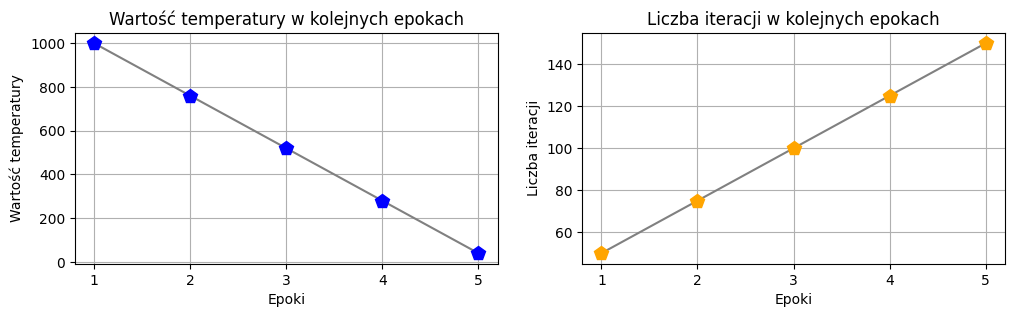

In [15]:
temps = TemperatureFunction(1000, 240, 5, version='arithmetic')
iters = IterationsFunction(100, 100, 5, version='constant')

plot_temperature_and_iterations(temps, iters)

## Działanie metody dla małego przypadku

In [16]:
random_result = SimulatedAnnealing(small_company, small_warehouse.stored_items, temps, iters, adj_version='random')[0]
margins_result = SimulatedAnnealing(small_company, small_warehouse.stored_items, temps, iters, adj_version='margins')[0]
profit_result = SimulatedAnnealing(small_company, small_warehouse.stored_items, temps, iters, adj_version='profit')[0]

print(f'WERSJA LOSOWA:    {random_result[1]:.2f}, osiągnięta w {random_result[0]} iteracji.')
print(f'WERSJA Z MARŻAMI: {margins_result[1]:.2f}, osiągnięta w {margins_result[0]} iteracji.')
print(f'WERSJA Z ZYSKAMI: {profit_result[1]:.2f}, osiągnięta w {profit_result[0]} iteracji.')

WERSJA LOSOWA:    2187.55, osiągnięta w 341 iteracji.
WERSJA Z MARŻAMI: 1767.30, osiągnięta w 16 iteracji.
WERSJA Z ZYSKAMI: 2195.88, osiągnięta w 153 iteracji.


## Działanie metody dla średniego przypadku

In [17]:
random_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='random')[0]
margins_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='margins')[0]
profit_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='profit')[0]

print(f'WERSJA LOSOWA:    {random_result[1]:.2f}, osiągnięta w {random_result[0]} iteracji.')
print(f'WERSJA Z MARŻAMI: {margins_result[1]:.2f}, osiągnięta w {margins_result[0]} iteracji.')
print(f'WERSJA Z ZYSKAMI: {profit_result[1]:.2f}, osiągnięta w {profit_result[0]} iteracji.')

WERSJA LOSOWA:    19792.80, osiągnięta w 486 iteracji.
WERSJA Z MARŻAMI: 18229.51, osiągnięta w 2 iteracji.
WERSJA Z ZYSKAMI: 21029.16, osiągnięta w 186 iteracji.


## Działanie metody dla dużego przypadku

In [18]:
random_result = SimulatedAnnealing(big_company, big_warehouse.stored_items, temps, iters, adj_version='random')[0]
margins_result = SimulatedAnnealing(big_company, big_warehouse.stored_items, temps, iters, adj_version='margins')[0]
profit_result = SimulatedAnnealing(big_company, big_warehouse.stored_items, temps, iters, adj_version='profit')[0]

print(f'WERSJA LOSOWA:    {random_result[1]:.2f}, osiągnięta w {random_result[0]} iteracji.')
print(f'WERSJA Z MARŻAMI: {margins_result[1]:.2f}, osiągnięta w {margins_result[0]} iteracji.')
print(f'WERSJA Z ZYSKAMI: {profit_result[1]:.2f}, osiągnięta w {profit_result[0]} iteracji.')

WERSJA LOSOWA:    37534.97, osiągnięta w 373 iteracji.
WERSJA Z MARŻAMI: 42584.97, osiągnięta w 1 iteracji.
WERSJA Z ZYSKAMI: 40795.24, osiągnięta w 53 iteracji.


## Wpływ współczynnika wyrzucanych elementów z rozwiązania

Przyjęta przez nas definicja sąsiedztwa mówi o tym, że sąsiednie rozwiązania zawierają pewien ułamek __tych samych__ części samochodowych w __tych samych__ ilościach.

Ten ułamek jest determinowany przez parametr __drop_coeff__.

Testy będą przeprowadzane dla:

* najlepszej wersji sąsiedztwa (__profit__),
* w przypadku średniej wielkości,
* poprzednich wersji temperatury i iteracji

i sprawdzą, czy współczynnik ma wpływ na szybsze dochodzenie do rozwiązania najlepszego.

In [30]:
avg_of_result = 0
avg_of_iterations = 0
for _ in range(100):
    best_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='profit', drop_coeff=0.1)[0]
    avg_of_result += best_result[1]
    avg_of_iterations += best_result[0]

print(f'Współczynnik 0.1 daje średni rezultat: {avg_of_result/100:.2f}, osiągnięty w ok. {round(avg_of_iterations/100)} iteracji.')

Współczynnik 0.1 daje średni rezultat: 20834.64, osiągnięty w ok. 49 iteracji.


In [31]:
avg_of_result = 0
avg_of_iterations = 0
for _ in range(100):
    best_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='profit', drop_coeff=0.25)[0]
    avg_of_result += best_result[1]
    avg_of_iterations += best_result[0]

print(f'Współczynnik 0.25 daje średni rezultat: {avg_of_result/100:.2f}, osiągnięty w ok. {round(avg_of_iterations/100)} iteracji.')

Współczynnik 0.1 daje średni rezultat: 20075.89, osiągnięty w ok. 38 iteracji.


In [32]:
avg_of_result = 0
avg_of_iterations = 0
for _ in range(100):
    best_result = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps, iters, adj_version='profit', drop_coeff=0.5)[0]
    avg_of_result += best_result[1]
    avg_of_iterations += best_result[0]

print(f'Współczynnik 0.5 daje średni rezultat: {avg_of_result/100:.2f}, osiągnięty w ok. {round(avg_of_iterations/100)} iteracji.')

Współczynnik 0.1 daje średni rezultat: 19514.04, osiągnięty w ok. 34 iteracji.


# Czas na zmienną funkcję temperatury

Zobaczmy zachowanie algorytmu dla różnych funkcji temperatury

In [4]:
const_iters = IterationsFunction(75, 75, 6, version='constant')

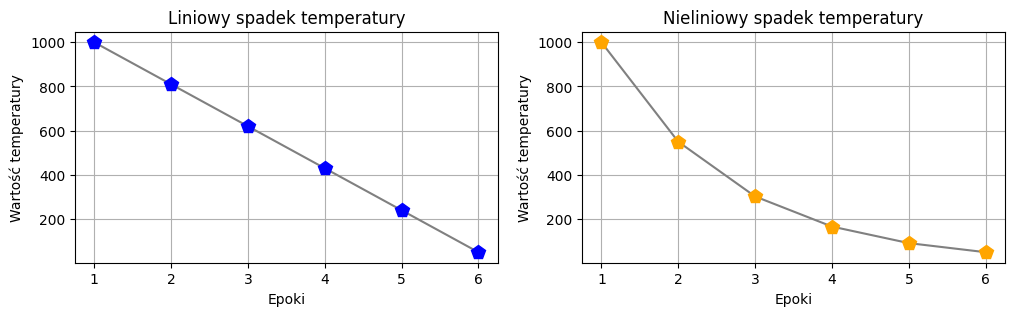

In [5]:
arith_temps = TemperatureFunction(1000, 190, 6, version='arithmetic')
geom_temps = TemperatureFunction(1000, 0.55, 6, version='geometric')

plot_temps_versions(arith_temps, geom_temps)

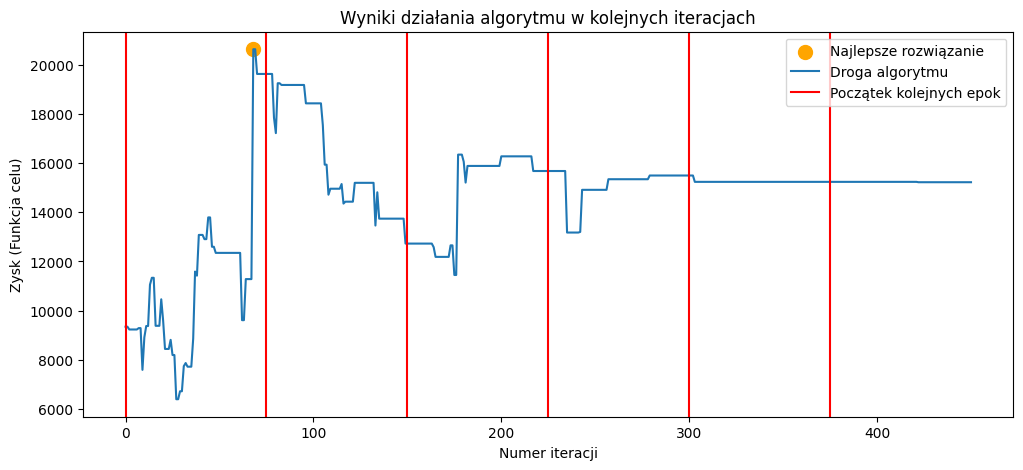

(68, 20622.764046078173)


In [6]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, arith_temps, const_iters)

plot_algorithm(way_of_algorithm, best_result, const_iters)
print(best_result)

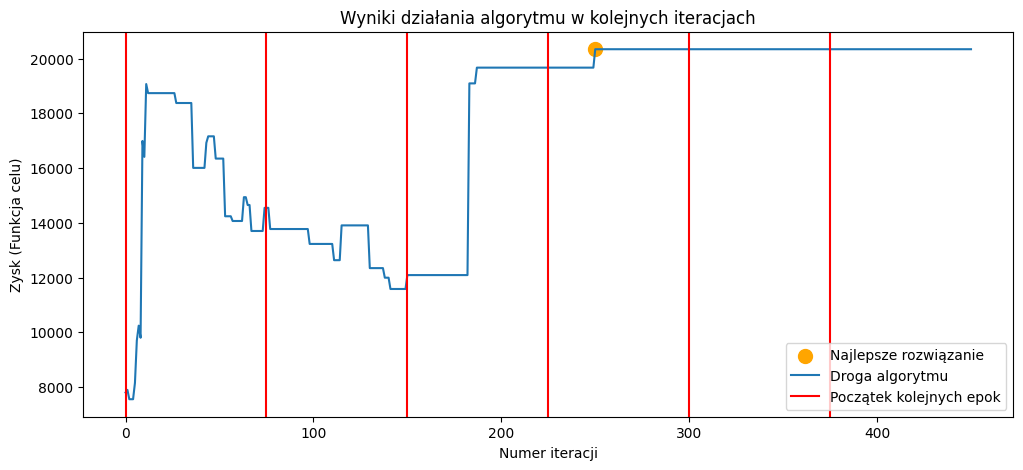

(250, 20342.3849759926)


In [7]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, geom_temps, const_iters)

plot_algorithm(way_of_algorithm, best_result, const_iters)
print(best_result)

# Czas na zmienną funkcję iteracji
Zobaczmy jak zmienia się ten parametr

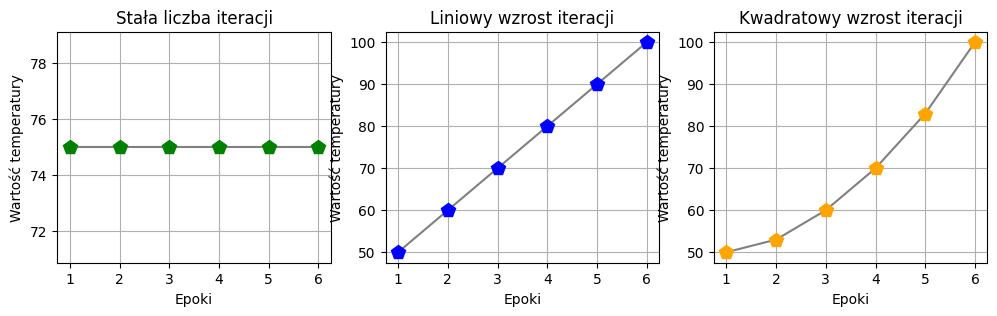

In [9]:
const_iters = IterationsFunction(75, 75, 6, version='constant')
linear_iters = IterationsFunction(50, 100, 6, version='linear')
square_iters = IterationsFunction(50, 100, 6, version='square')

plot_iters_versions(const_iters, linear_iters, square_iters)

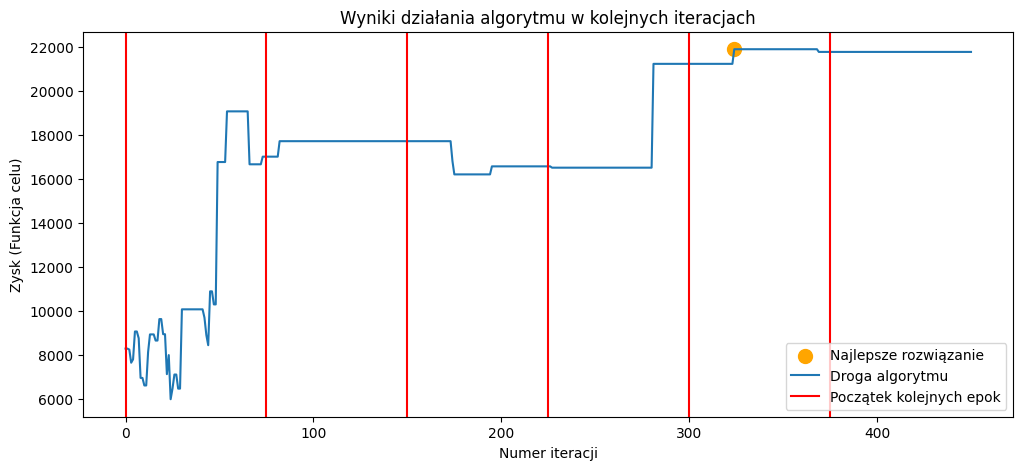

(324, 21887.84203737139)


In [10]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, geom_temps, const_iters)

plot_algorithm(way_of_algorithm, best_result, const_iters)
print(best_result)

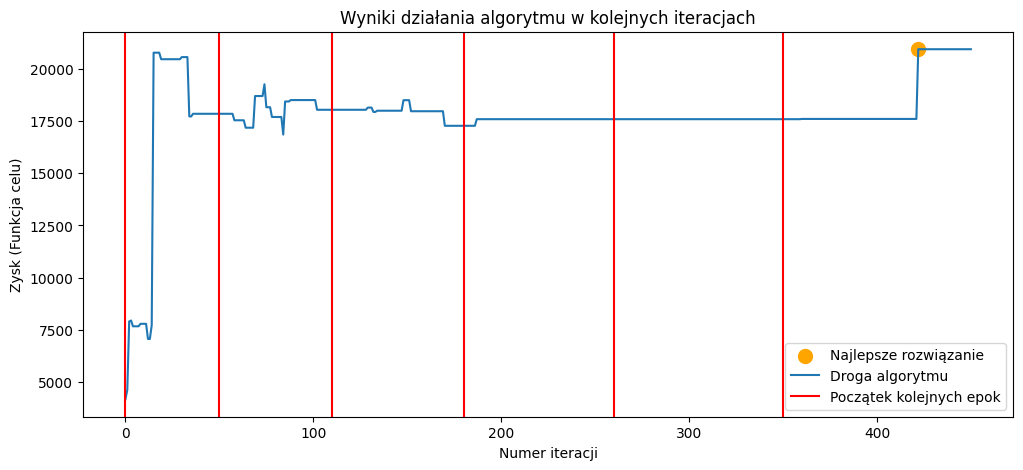

(422, 20930.570852636003)


In [13]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, geom_temps, linear_iters)

plot_algorithm(way_of_algorithm, best_result, linear_iters)
print(best_result)

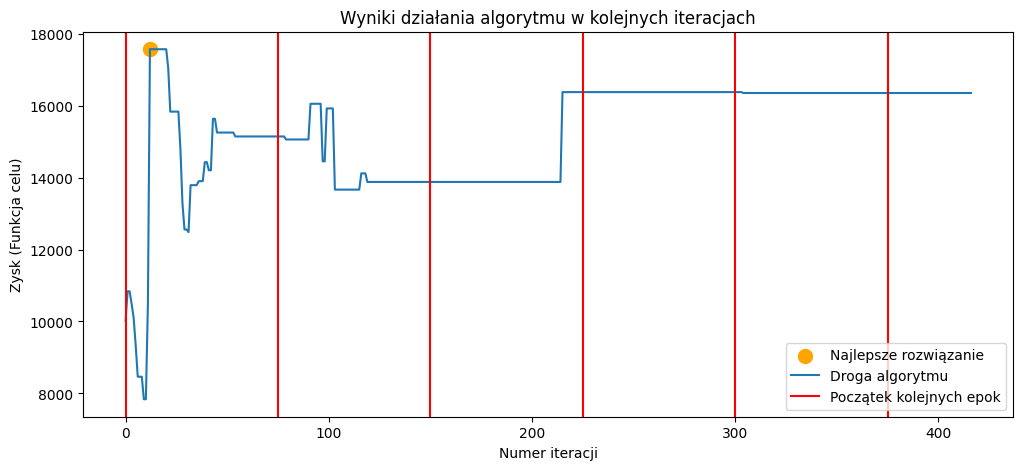

(12, 17570.07235885794)


In [12]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, geom_temps, square_iters)

plot_algorithm(way_of_algorithm, best_result, const_iters)
print(best_result)

# Złożoności czasowe

Gdy mamy już wybrane najlepsze wersje algorytmu zobaczmy na złożoności czasowe

### Mały przypadek

In [17]:
%%timeit range(10)
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(small_company, small_warehouse.stored_items, geom_temps, square_iters)

87.9 ms ± 6.91 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Średni przypadek

In [18]:
%%timeit range(10)
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, geom_temps, square_iters)

1.49 s ± 185 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Duży przypadek

In [20]:
%%timeit range(10)
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(big_company, big_warehouse.stored_items, geom_temps, square_iters)

50.9 s ± 3.72 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


# COS SIĘ SCHRZANIŁO W SĄSIEDZTWIE MARGINS

# COS SIĘ SCHRZANIŁO W SĄSIEDZTWIE MARGINS

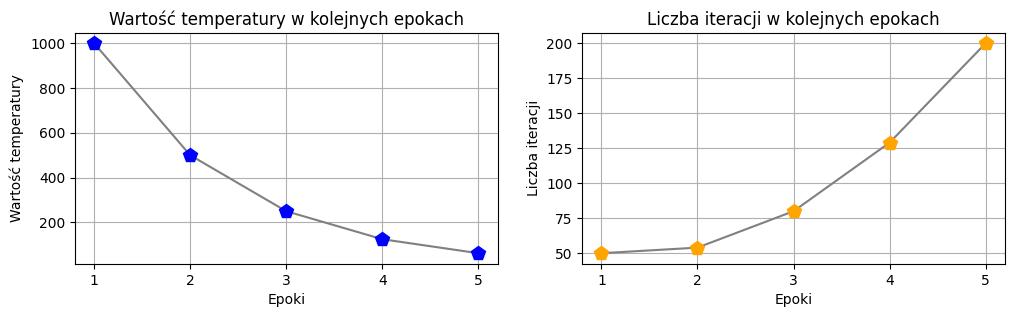

In [20]:
temps1 = TemperatureFunction(1000, 0.5, 5, version='geometric')
iters1 = IterationsFunction(50, 200, 5, version='square')

plot_temperature_and_iterations(temps1, iters1)

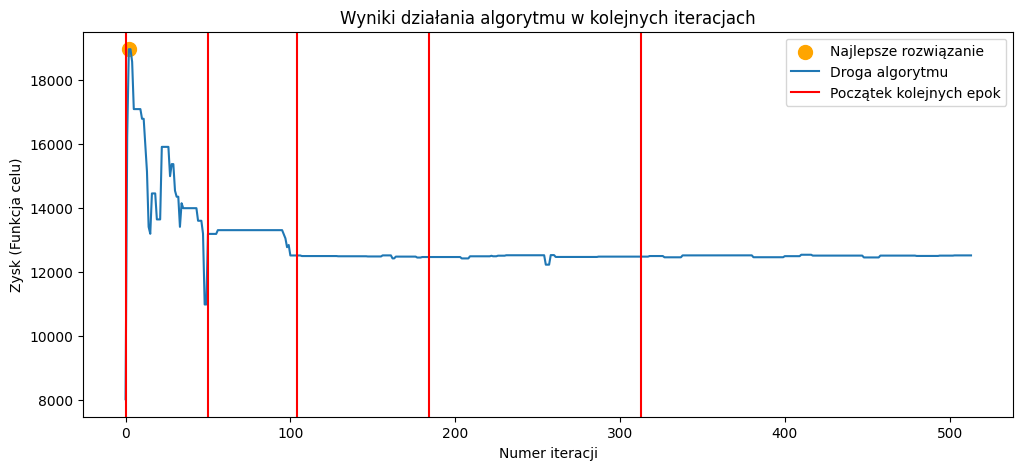

(2, 18954.734877094692)
AUDI A6 Filtr oleju: 
 462x32zł, 64.47%
Opel Insignia Filtr oleju: 
 1x51zł, 32.14%
Mazda mx5 Filtr oleju: 
 146x38zł, 31.41%
Fiat Panda Sprężyna przednia: 
 1x173zł, 29.15%
Skoda Fabia Tarcza hamulcowa: 
 47x113zł, 26.27%
Mazda mx5 Tarcza hamulcowa: 
 34x146zł, 19.13%
BMW e46 Sprężyna przednia: 
 1x244zł, 16.13%
BMW e46 Klocki hamulcowe: 
 23x77zł, 29.62%
Chevrolet Camaro Tarcza hamulcowa: 
 130x76zł, 28.73%
Chevrolet Camaro Sprężyna przednia: 
 84x83zł, 26.78%


In [21]:
best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(medium_company, medium_warehouse.stored_items, temps1, iters1, adj_version='margins')

plot_algorithm(way_of_algorithm, best_result, iters1)
print(best_result)
print_selected_items(chosen_items)

In [22]:
warehouse = Warehouse()

fill_warehouse(warehouse, 'data/Items-MediumList.csv')

company = Company(10, 50000, 0.1)

temps = TemperatureFunction(1000, 0.5, 5, version='geometric')
iters = IterationsFunction(50, 200, 5, version='square')
# temps = [1000, 900, 800, 700, 600]
# iters = [1, 1, 1, 1, 1]

result, best_result, chosen_items, way_of_algorithm = SimulatedAnnealing(company, warehouse.stored_items, temps, iters, init_version='uncommon')

plot_temperature_and_iterations(temps, iters)
plot_algorithm(way_of_algorithm, best_result, iters)
print(best_result)
print_selected_items(chosen_items)

ValueError: not enough values to unpack (expected 4, got 3)